In [2]:
import cv2
from glob import glob
from matplotlib import pyplot as plt
import numpy as np

In [26]:
imfiles = ['{}/images/{}.png'.format(folder, folder.split('/')[-1]) for folder in glob('data/stage1_train/*')]
maskfiles = [glob('{}/masks/*.png'.format(folder)) for folder in glob('data/stage1_train/*')]

In [27]:
i = 23

60 1740b0a67ca337ea31648b57c81bcfbb841c7bb5cad185199a9f4da596d531b9.png


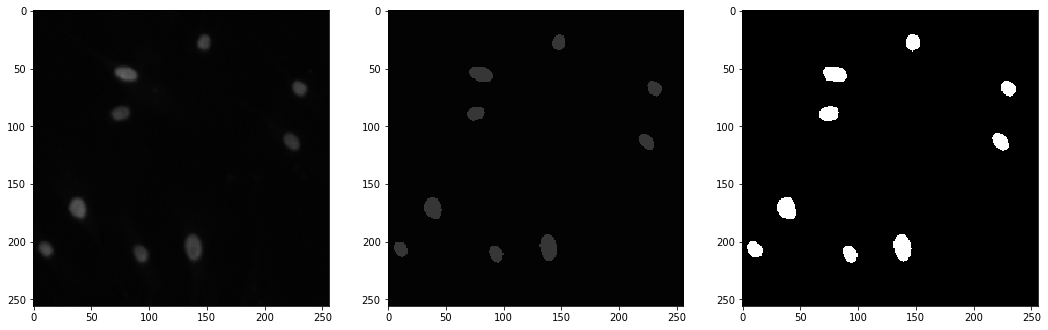

In [66]:
print(i, imfiles[i].split('/')[-1])

img = np.flip(cv2.imread(imfiles[i]), 2)
masks = np.sum(np.stack([cv2.imread(mask, cv2.IMREAD_GRAYSCALE).reshape((-1)) for mask in maskfiles[i]]), axis=0).reshape((img.shape[:2]))


Z = np.float32(img.reshape((-1,3)))

crit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1)
ret, label, center = cv2.kmeans(Z, 2, None, crit, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))


fig, ax = plt.subplots(1, 3, figsize=(18,6))
ax[0].imshow(img)
ax[1].imshow(res2)
ax[2].imshow(masks, cmap='gray')

i += 1

In [258]:
imfiles[63]

'data/stage1_train/193ffaa5272d5c421ae02130a64d98ad120ec70e4ed97a72cdcd4801ce93b066/images/193ffaa5272d5c421ae02130a64d98ad120ec70e4ed97a72cdcd4801ce93b066.png'